Ejercicio 1.1


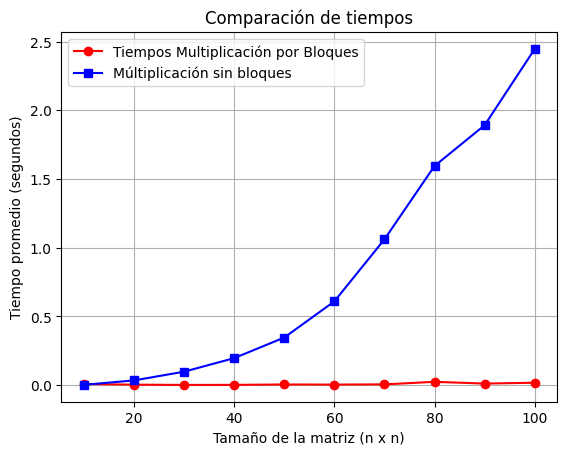

In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def MultMatBloques(A, B, bloque):
    """
    Multiplica dos matrices A y B por bloques.

    Parámetros:
    A (ndarray): Primera matriz de tamaño (n, n).
    B (ndarray): Segunda matriz de tamaño (n, n).
    bloque (int): Tamaño del bloque para la multiplicación.

    Retorna:
    MatResultado  (ndarray): Matriz resultado de la multiplicación de A y B por bloques.

    La multiplicación de matrices por bloques se utiliza para dividir las matrices A y B en submatrices más pequeñas,
    con el fin de realizar la multiplicación de manera más eficiente para matrices grandes.
    """
    n = A.shape[0]  # Obtener el tamaño de la matriz (asumimos que A es cuadrada)
    MatResultado = np.zeros((n, n))  # Inicializar la matriz resultado

    # Iterar sobre los bloques de la matriz
    for i in range(0, n, bloque):  # Recorremos las filas de A en pasos del tamaño del bloque
        for j in range(0, n, bloque):  # Recorremos las columnas de B en pasos del tamaño del bloque
            for k in range(0, n, bloque):  # Recorremos las columnas de A y las filas de B en pasos del bloque
                # Realizamos la multiplicación de bloques y sumamos al bloque correspondiente de la matriz resultado
                MatResultado [i:i+bloque, j:j+bloque] += np.dot(
                    A[i:i+bloque, k:k+bloque],  # Bloque de la matriz A
                    B[k:k+bloque, j:j+bloque]   # Bloque de la matriz B
                )
    return MatResultado



def MultMat(Mat1, Mat2):
    # Inicializa una matriz de ceros con las dimensiones adecuadas
    Mat3 = np.zeros((Mat1.shape[0], Mat2.shape[1]))

    # Itera sobre cada fila de la primera matriz
    for row in range(Mat1.shape[0]):
        # Itera sobre cada columna de la segunda matriz
        for col in range(Mat2.shape[1]):
            # Realiza la multiplicación y suma los productos
            for aux in range(Mat2.shape[0]):
                Mat3[row, col] += Mat1[row, aux] * Mat2[aux, col]

    # Devuelve la matriz resultante
    return Mat3

tamaños = list(range(10, 101, 10))  # Tamaños de 10x10 hasta 100x100
tiempos1 = []
tiempos2 = []
for n in tamaños:
    A = np.random.rand(n, n)  # Matriz aleatoria de tamaño n x n
    B = np.random.rand(n, n)     # Vector aleatorio de tamaño n
    bloque= 10

    # Medir tiempo de ejecución
    tiempo1 = timeit.timeit(lambda: MultMatBloques(A, B, bloque), number=1)
    tiempos1.append(tiempo1)
    tiempo2 = timeit.timeit(lambda: MultMat(A,B), number=1)
    tiempos2.append(tiempo2)

# Graficar los resultados
plt.plot(tamaños, tiempos1, marker='o', linestyle='-', color='r', label="Tiempos Multiplicación por Bloques")
plt.plot(tamaños, tiempos2, marker='s', linestyle='-', color='b', label="Múltiplicación sin bloques")
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Comparación de tiempos")
plt.legend()
plt.grid()
plt.show()